In [33]:
# Step 1: Load the sample data
sample_data = pd.read_csv('data.csv')
sample_data['Date'] = pd.to_datetime(sample_data['Date'])



In [26]:
!python3 -m pip install pandas numpy matplotlib

In [27]:
# Display the first few rows
print("Sample Data:")
print(sample_data.head())

Sample Data:
        Date   Kc  ETo (mm/day)  Temp Min (°C)  Temp Max (°C)  Humidity (%)  \
0 2021-11-01  0.3          5.15          14.22          25.14         73.44   
1 2021-11-02  0.3          5.59          11.24          27.23         49.09   
2 2021-11-03  0.3          4.60          11.72          28.62         59.48   
3 2021-11-04  0.3          2.68           7.61          34.51         52.77   
4 2021-11-05  0.3          3.04           9.10          24.48         31.04   

   Rainfall (mm)  Wind Speed (m/s)  Solar Radiation (MJ/m²)  ETc (mm/day)  \
0           6.73              3.07                    12.57          1.55   
1           4.86              3.21                    20.46          1.68   
2           9.13              2.98                    23.91          1.38   
3           2.48              4.86                    11.78          0.80   
4           1.91              4.12                    16.43          0.91   

   DayOfYear  
0        305  
1        306  
2   

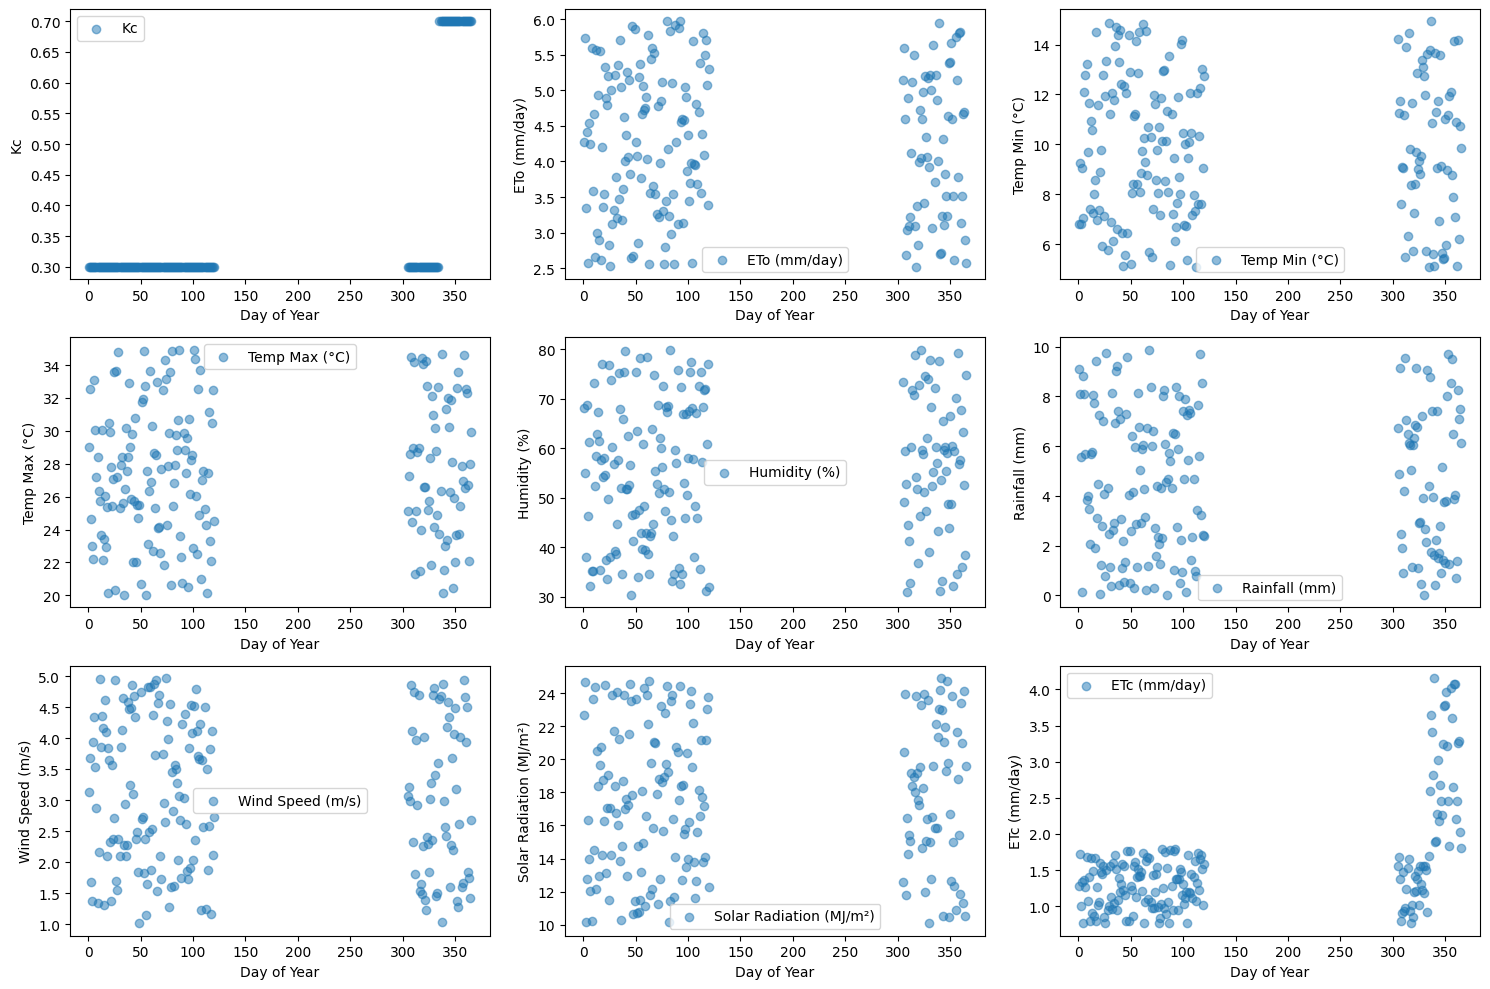

In [28]:
# Step 2: Analyze the existing data
# Calculate the day of the year to identify seasonal patterns
sample_data['DayOfYear'] = sample_data['Date'].dt.dayofyear

# Visualize patterns for key variables
variables_to_plot = ['Kc', 'ETo (mm/day)', 'Temp Min (\u00b0C)', 'Temp Max (\u00b0C)',
                     'Humidity (%)', 'Rainfall (mm)', 'Wind Speed (m/s)',
                     'Solar Radiation (MJ/m\u00b2)', 'ETc (mm/day)']

plt.figure(figsize=(15, 10))
for i, var in enumerate(variables_to_plot, 1):
    plt.subplot(3, 3, i)
    plt.scatter(sample_data['DayOfYear'], sample_data[var], alpha=0.5, label=var)
    plt.xlabel('Day of Year')
    plt.ylabel(var)
    plt.legend()
plt.tight_layout()
plt.show()


In [29]:

# Step 3: Extend the data for additional years
# Set the range of years for extension
end_year = sample_data['Date'].dt.year.min() - 1
start_year = end_year - 15

date_range = pd.date_range(start=f'{start_year}-01-01', end=f'{end_year}-12-31', freq='D')


date_range = pd.date_range(start=f'{start_year}-01-01', end=f'{end_year}-12-31', freq='D')

# Create a new DataFrame with the extended date range
extended_data = pd.DataFrame({'Date': date_range})
extended_data['DayOfYear'] = extended_data['Date'].dt.dayofyear

# Generate synthetic data based on seasonal patterns
np.random.seed(42)  # For reproducibility

for var in variables_to_plot:
    # Fit a sinusoidal pattern to each variable using the sample data
    day_of_year = sample_data['DayOfYear']
    values = sample_data[var]

    # Calculate average and amplitude for synthetic data
    mean = values.mean()
    amplitude = (values.max() - values.min()) / 2

    # Generate sinusoidal pattern with random noise
    extended_data[var] = (
        mean
        + amplitude * np.sin(2 * np.pi * extended_data['DayOfYear'] / 365)
        + np.random.normal(0, amplitude * 0.1, size=len(extended_data))  # Add noise
    )

# Adjust values to ensure they remain realistic (e.g., no negative rainfall)
extended_data['Rainfall (mm)'] = extended_data['Rainfall (mm)'].clip(lower=0)
extended_data['Humidity (%)'] = extended_data['Humidity (%)'].clip(lower=0, upper=100)

In [30]:

# Step 4: Export the extended dataset
extended_data.to_csv('extended_data.csv', index=False)

In [37]:
print("Data extension complete. Extended dataset saved to 'extended_data.csv'.")

# Display the first few rows of the extended dataset
print("Extended Data:")
extended_data.head()

Data extension complete. Extended dataset saved to 'extended_data.csv'.
Extended Data:


,Date,DayOfYear,Kc,ETo (mm/day),Temp Min (°C),Temp Max (°C),Humidity (%),Rainfall (mm),Wind Speed (m/s),Solar Radiation (MJ/m²),ETc (mm/day)
0,2005-01-01,1,0.381885,4.410750,9.789106,27.353136,57.434054,5.111446,3.087441,18.526496,1.819442
1,2005-01-02,2,0.372627,4.222018,10.665783,28.499545,59.809813,4.871262,3.113062,16.859869,1.459451
2,2005-01-03,3,0.391786,4.850683,9.826846,27.045894,58.197544,4.236209,3.166388,17.351438,1.615742
3,2005-01-04,4,0.412729,4.203843,11.058563,27.979741,57.406503,5.976850,3.235905,17.176950,1.641644
4,2005-01-05,5,0.381018,4.246024,11.005993,28.735889,55.874160,5.319756,3.499658,16.266930,1.649583


In [34]:
extended_data.tail()

,Date,DayOfYear,Kc,ETo (mm/day),Temp Min (°C),Temp Max (°C),Humidity (%),Rainfall (mm),Wind Speed (m/s),Solar Radiation (MJ/m²),ETc (mm/day)
5839,2020-12-27,362,0.346359,4.181085,10.093201,26.822384,57.120073,3.755115,3.098418,16.729874,1.499757
5840,2020-12-28,363,0.368791,4.401358,9.863789,27.707284,52.938048,4.607645,3.167810,18.087707,1.500196
5841,2020-12-29,364,0.341134,4.314445,9.939616,27.049812,52.589370,4.814911,3.313571,17.978751,1.457232
5842,2020-12-30,365,0.338638,4.448826,10.126560,27.685468,52.074119,5.122910,3.172093,17.080473,1.471558
5843,2020-12-31,366,0.329472,3.803384,10.336397,28.165306,55.306810,4.970867,3.181733,18.038632,1.624599
